## 1. Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

C:\Users\mosta\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\mosta\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. Create a Simple Dataset

In [2]:
data = {
'review': [
"I love this movie",
"Horrible acting",
"What a great film",
"Worst movie ever",
"Really enjoyed it",
"It was terrible",
"Fantastic performance",
"Not good at all"
],
'label': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive',
'negative']
}
df = pd.DataFrame(data)

## 3. Split the Data (with stratification to avoid biased sampling)

In [3]:
# 2. Split the Data
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 4. Convert Text to Numeric Format (fitting only on training data to prevent data leakage)

In [4]:
# 3. Convert Text to Numeric Format
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## 5. Train the Model

In [5]:
# 5. Train the Model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

## 6. Evaluate the Model

In [6]:
# 6. Evaluate the Model
predictions = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, predictions)


## 7. Test Your Own Review

In [7]:
# 7. Test Your Own Review
new_review = ["I would not recommend this movie, it was so boring"]
new_review_vectorized = vectorizer.transform(new_review)
new_prediction = model.predict(new_review_vectorized)

## 8.Print the final output for your project coversheet

In [8]:
print(f"Model Accuracy: {accuracy}")
print(f"Prediction for new review: {new_prediction[0]}")

Model Accuracy: 0.5
Prediction for new review: positive


## some modifications

In [8]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# 2. Create an Expanded Dataset for better training and evaluation
data = {
    'review': [
        "I absolutely loved this movie, the plot was captivating and the acting was superb!",
        "Horrible acting, the story made no sense and I walked out halfway through.",
        "What a truly great film, a masterpiece of storytelling and visual effects.",
        "Worst movie ever made, a complete waste of time and money, totally unwatchable.",
        "Really enjoyed it, a surprisingly good film with a strong message.",
        "It was terrible, bland characters and a predictable storyline.",
        "Fantastic performance by the lead actor, truly a standout movie of the year.",
        "Not good at all, I found myself bored and uninterested from beginning to end.",
        "A surprisingly poignant and well-crafted drama, highly recommended.",
        "Absolutely awful, I regret every minute I spent watching this.",
        "The cinematography was breathtaking, a visual feast.",
        "Completely unoriginal, seen it all before. Disappointing.",
        "Left me thinking for days, truly impactful.",
        "Just a dreadful experience, avoid at all costs.",
        "An engaging plot with unexpected twists.",
        "So boring I fell asleep multiple times.",
        "Hilarious and heartwarming, a real gem!",
        "Felt like a chore to watch, poorly paced.",
        "An emotional rollercoaster, brilliantly executed.",
        "Simply a disaster, nothing worked.",
        "Great movie, highly recommend for a fun night in.",
        "Terrible script, the dialogues were cringeworthy.",
        "Loved the direction and the unique premise.",
        "Could not stand the main character, very annoying.",
        "A true cinematic achievement, stunning!",
        "This film had no redeeming qualities whatsoever.",
        "The story was compelling and kept me hooked.",
        "Pointless and dragged on forever."
    ],
    'label': [
        'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative',
        'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative',
        'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative',
        'positive', 'negative', 'positive', 'negative'
    ]
}
df = pd.DataFrame(data)

In [9]:
# 3. Split the Data (with stratification to avoid biased sampling)
# Stratification ensures that the proportion of positive/negative reviews is maintained in train/test sets.
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Convert Text to Numeric Format (fitting only on training data to prevent data leakage)
# CountVectorizer converts text reviews into a matrix of token counts.
# Fitting only on X_train ensures that the vocabulary learned is from the training data only,
# preventing the model from 'seeing' words from the test set prematurely.
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 5. Hyperparameter Tuning with Grid Search
# Define a parameter grid for Multinomial Naive Bayes.
# alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

# Initialize GridSearchCV.
# cv=5: Performs 5-fold cross-validation.
# scoring='accuracy': The metric used to evaluate models during cross-validation.
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit Grid Search to the training data to find the best alpha.
print("\n--- Running Grid Search for best alpha ---")
grid_search.fit(X_train_vectorized, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_
print(f"Best parameters found by Grid Search: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# 6. Evaluate the Best Model found by Grid Search
predictions = best_model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, predictions)

print("\n--- Model Evaluation (using best model from Grid Search) ---")
print(f"Test Set Accuracy: {accuracy:.2f}") # Formatted to two decimal places

# 7. More Detailed Metrics: Classification Report and Confusion Matrix
print("\n--- Classification Report ---")
# Classification report provides precision, recall, f1-score, and support for each class.
print(classification_report(y_test, predictions))


--- Running Grid Search for best alpha ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found by Grid Search: {'alpha': 0.5}
Best cross-validation accuracy: 0.56

--- Model Evaluation (using best model from Grid Search) ---
Test Set Accuracy: 0.83

--- Classification Report ---
              precision    recall  f1-score   support

    negative       0.75      1.00      0.86         3
    positive       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6




--- Confusion Matrix ---
True Positive (Predicted Positive, Actual Positive): 2
False Negative (Predicted Negative, Actual Positive): 1
False Positive (Predicted Positive, Actual Negative): 0
True Negative (Predicted Negative, Actual Negative): 3

Raw Confusion Matrix:
[[2 1]
 [0 3]]

ROC-AUC Score: 0.89


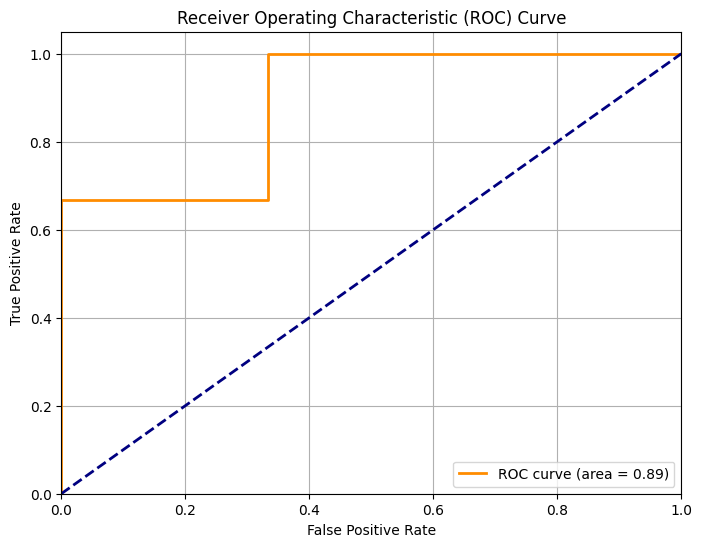


--- Learning Curve Analysis (Data for Plot) ---
Training sizes: [ 1  5  9 13 17]
Mean training scores per size: [1. 1. 1. 1. 1.]
Mean cross-validation scores per size: [0.46 0.31 0.42 0.55 0.51]


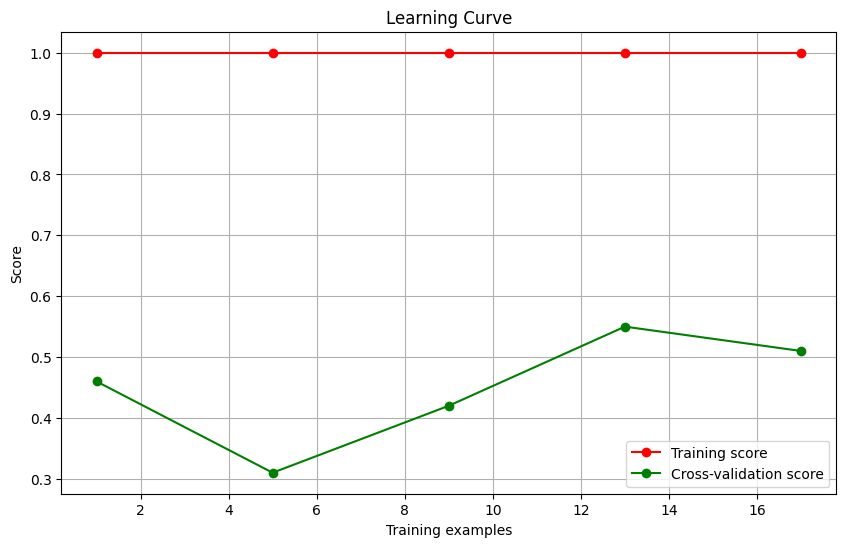

In [10]:
print("\n--- Confusion Matrix ---")
# Confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions.
cm = confusion_matrix(y_test, predictions, labels=['positive', 'negative'])
print(f"True Positive (Predicted Positive, Actual Positive): {cm[0, 0]}")
print(f"False Negative (Predicted Negative, Actual Positive): {cm[0, 1]}")
print(f"False Positive (Predicted Positive, Actual Negative): {cm[1, 0]}")
print(f"True Negative (Predicted Negative, Actual Negative): {cm[1, 1]}")
print("\nRaw Confusion Matrix:")
print(cm)


# 8. ROC-AUC Curve (Score Calculation)
# ROC AUC is generally used for binary classification. It measures the area under the ROC curve.
# A higher AUC score means a better model.
# For string labels, we need to convert them to binary (0/1) for roc_auc_score.
try:
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)
    y_scores = best_model.predict_proba(X_test_vectorized)[:, lb.classes_.tolist().index('positive')]
    roc_auc = roc_auc_score(y_test_binarized, y_scores)
    print(f"\nROC-AUC Score: {roc_auc:.2f}")

    #To conceptually show the ROC curve (plotting requires matplotlib, which would output an image)
    fpr, tpr, thresholds = roc_curve(y_test_binarized, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show() # In a real environment, this would display the plot. Here, we only show the score.

except Exception as e:
    print(f"\nCould not calculate ROC-AUC score. This might happen with very small test sets or specific label issues: {e}")


# 9. Learning Curve Analysis
# A learning curve plots the training and cross-validation accuracy of a model
# as a function of the number of training examples.
# It helps to diagnose whether the model suffers from high bias (underfitting) or high variance (overfitting).
print("\n--- Learning Curve Analysis (Data for Plot) ---")

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_vectorized, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("Training sizes:", train_sizes)
print("Mean training scores per size:", train_scores_mean)
print("Mean cross-validation scores per size:", test_scores_mean)
# In a full plotting environment, you would use these arrays with matplotlib to plot:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()




In [11]:
# 10. Test Your Own Review (using the best trained model)
your_review = ["I would not recommend this movie, it was so boring"]
your_review_vectorized = vectorizer.transform(your_review)
your_prediction = best_model.predict(your_review_vectorized)

print(f"\n--- Prediction for Your Own Review ---")
print(f"Review: \"{your_review[0]}\"")
print(f"Predicted Sentiment: {your_prediction[0]}")



--- Prediction for Your Own Review ---
Review: "I would not recommend this movie, it was so boring"
Predicted Sentiment: negative
